## Kaggle Dataset Link:https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

## Import the required libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

## Reading the dataset

In [2]:
df=pd.read_csv("car data.csv")

## checking the first 5 rows of the dataset.

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape ## 301 rows and 9 features

(301, 9)

## Note: Selling Price is Our Dependent Variable.

## After Verifying the dataset, we can see that Fuel_type, Seller_Type, Transmission and Owner are our categorical features and we need to find the unique categories from them.

In [5]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


## Check Missing or Null values

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Now We have to derived the Feature(i.e.Number of Years) From Year Feature as The Car is purchased at the time of say 1990, the depreciation value associated with that year should also be displayed.

In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## We Will exclude Car_Name Feature as there might be many number of cars and based on car brands we are unable to predict the selling price of the car.

In [9]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Deriving the New Feature from the feature Year.

In [11]:
final_dataset['Current_Year']=2024

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024


## The Purpose of adding the new Feature is to know that how much years old car is there.

## Formula:(Current_Year-Year)

In [13]:
final_dataset['no_year']=final_dataset['Current_Year']-final_dataset['Year']

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


## Now we will drop the Year and Current_Year Features as it is taken care by the no_year(Number of years Feature).

In [15]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


## Similarly we will drop Current_Year Feature as well.

In [17]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


## Now we will Convert Categorical Features to one hot encoding using pandas getdummies Operation.

In [19]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [20]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


## Finding the Correlation amongst the Features.

In [21]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


## Showing the Correlation in a diagramatic way.

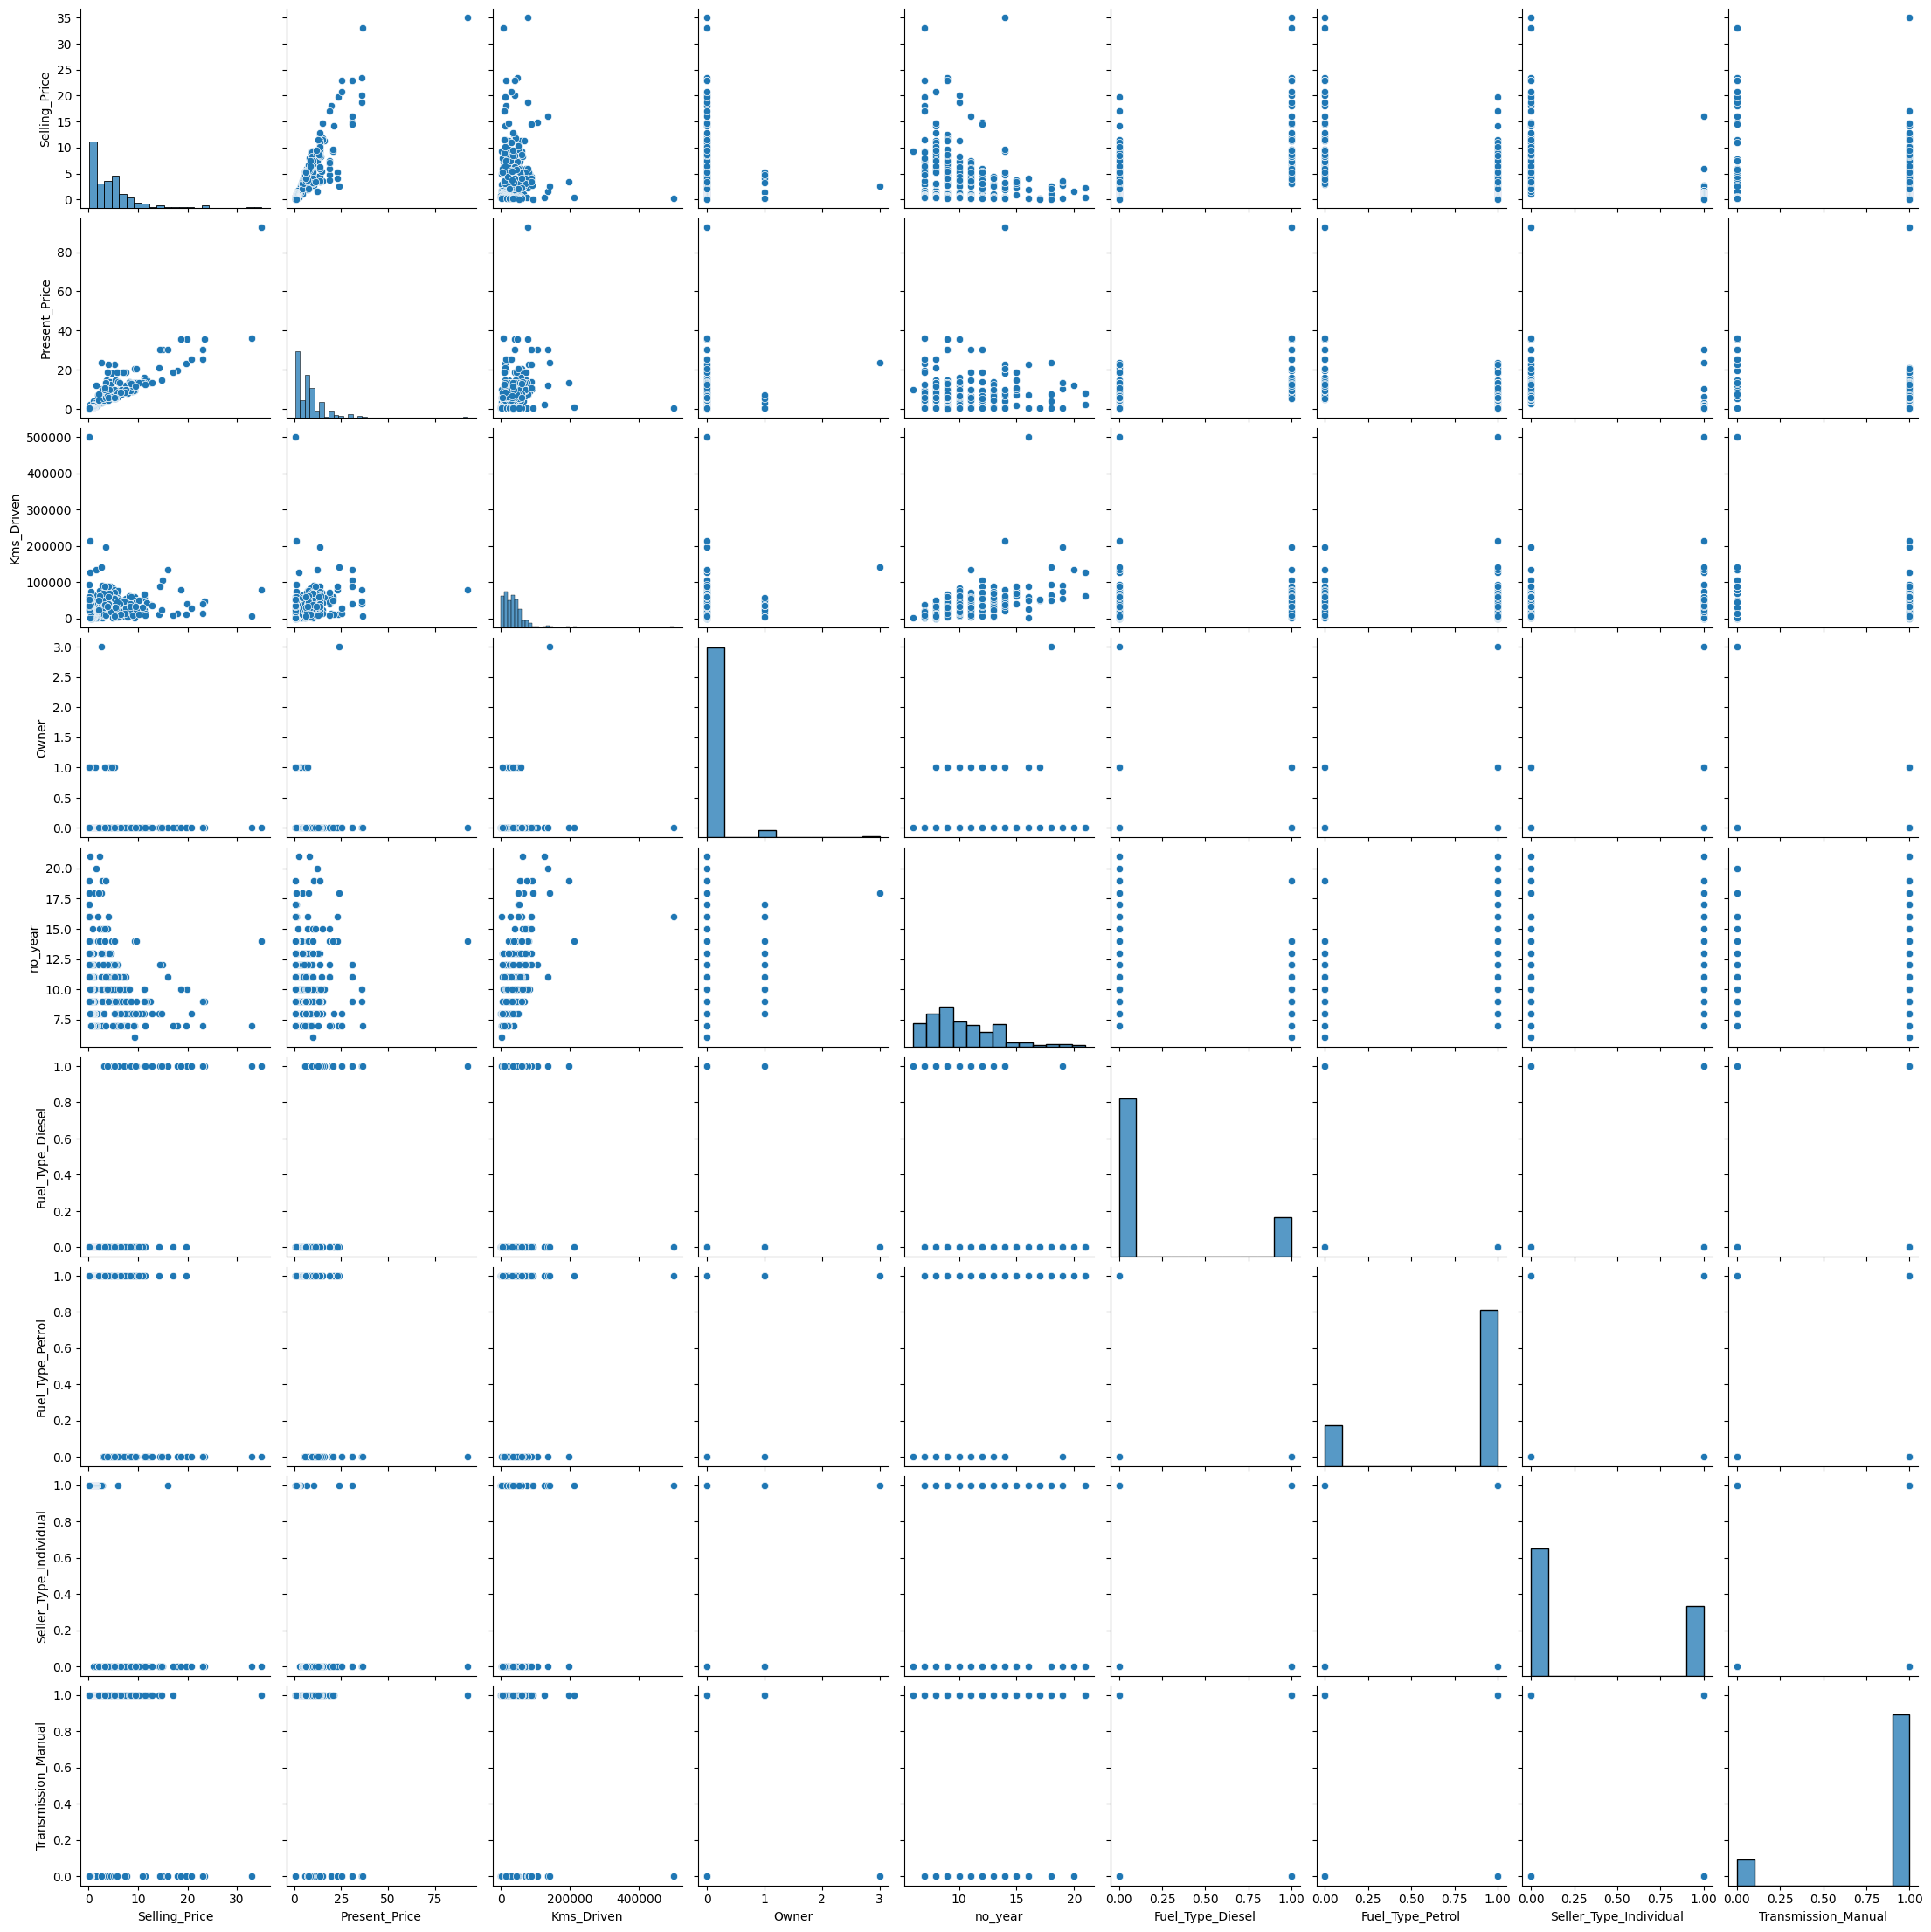

In [22]:
sns.pairplot(final_dataset)

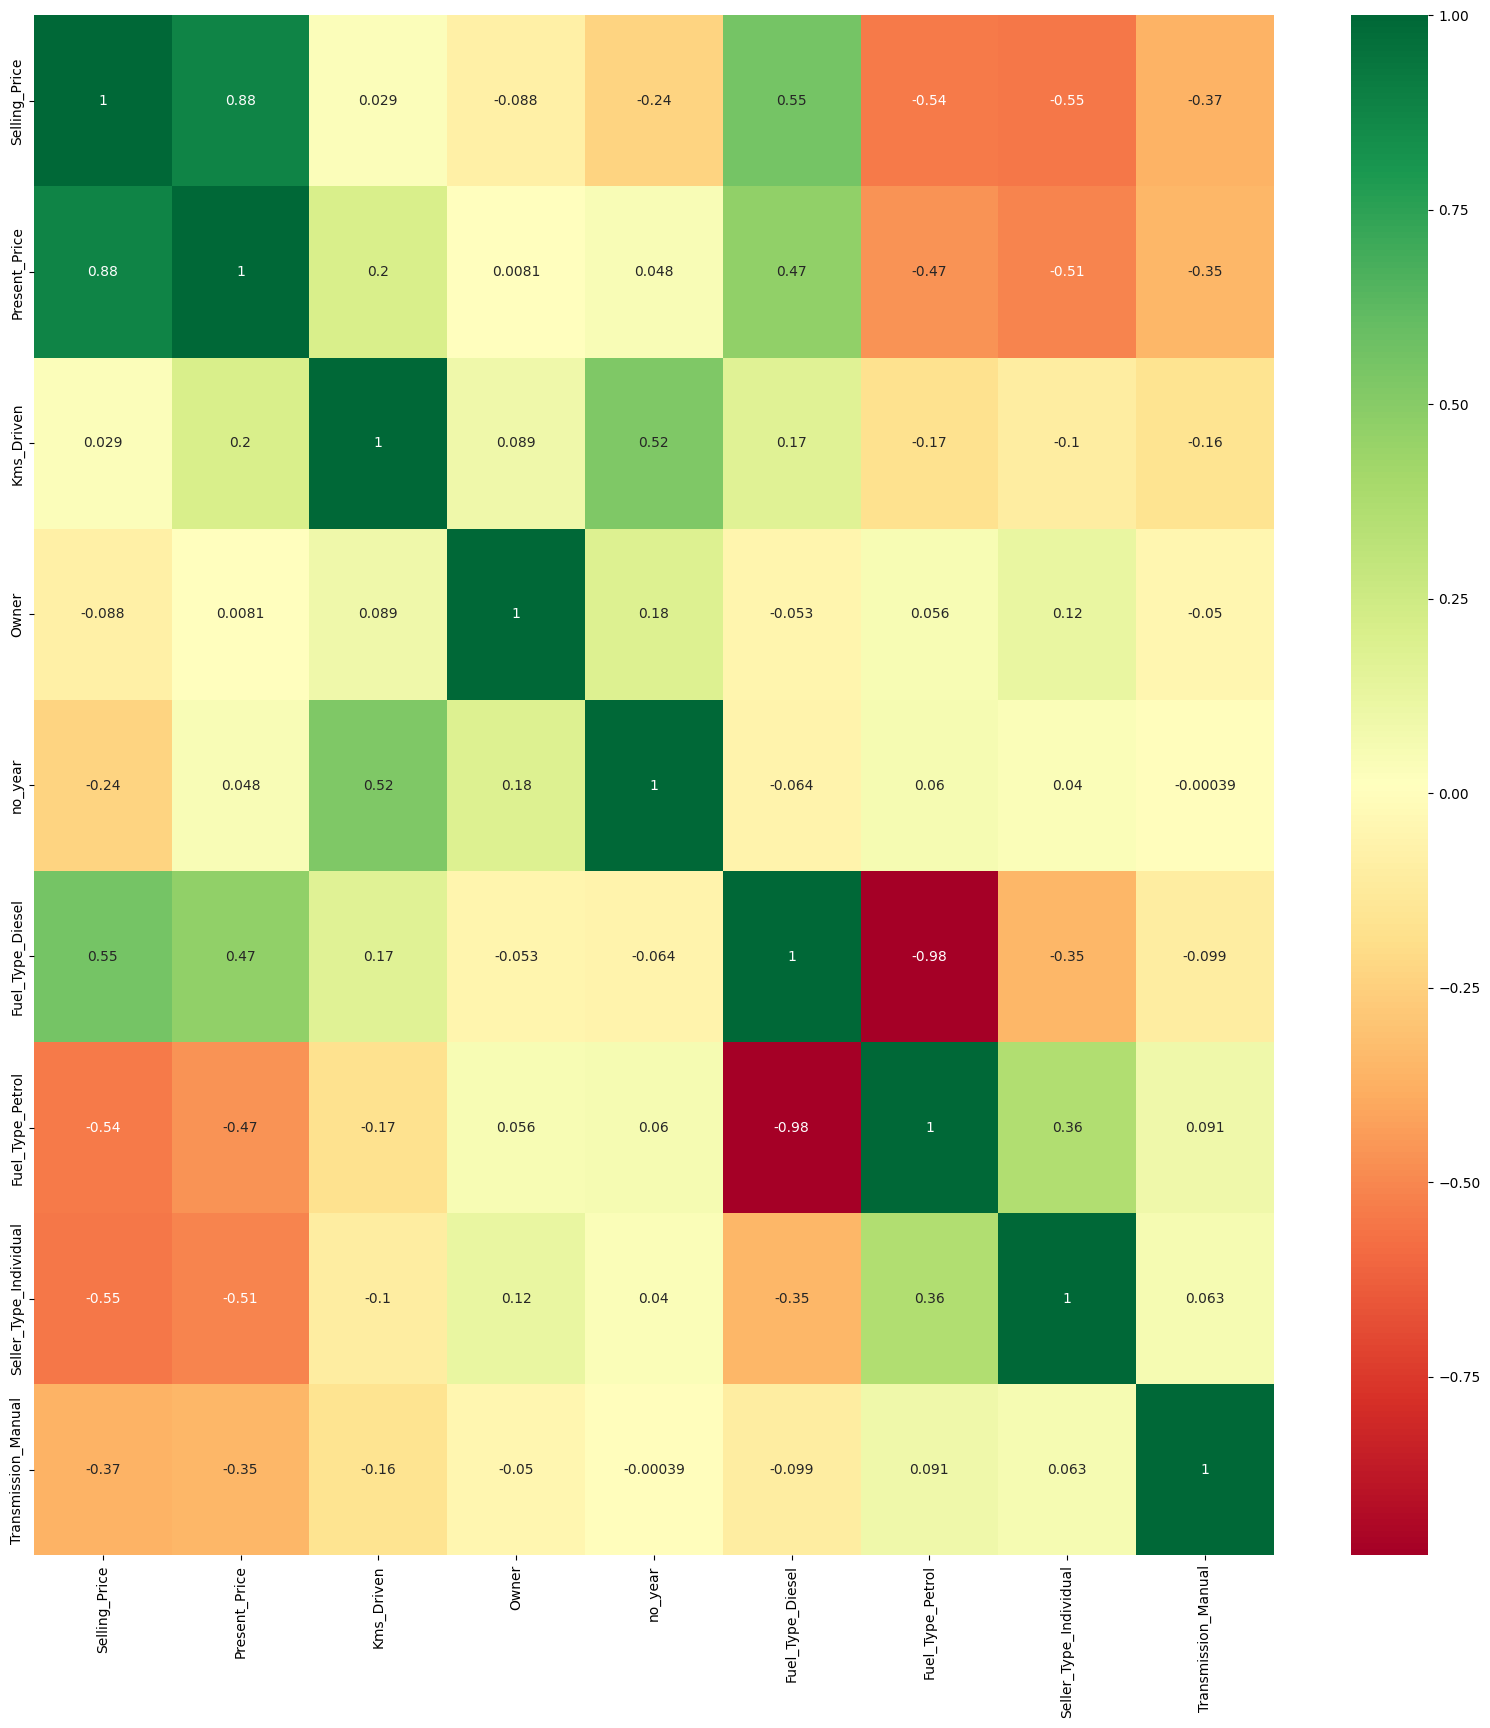

In [23]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
# plot Heatmap
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [24]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


In [25]:
## independent and dependent features
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [26]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,10,0,1,0,1
1,9.54,43000,0,11,1,0,0,1
2,9.85,6900,0,7,0,1,0,1
3,4.15,5200,0,13,0,1,0,1
4,6.87,42450,0,10,1,0,0,1


In [27]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## Feature Importance

In [28]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [29]:
print(model.feature_importances_)

[0.36902834 0.0394626  0.00038575 0.08005374 0.22860635 0.00923677
 0.13371853 0.13950792]


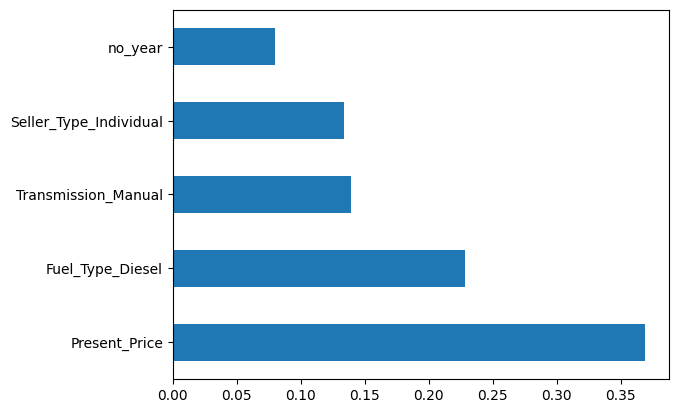

In [30]:
## plot graph of feature importances for better visualization
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [32]:
X_train

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
198,0.57,35000,1,13,0,1,1,1
102,1.78,4000,0,7,0,1,1,1
240,9.40,32322,0,12,1,0,0,1
65,6.95,45000,0,10,1,0,0,1
35,7.74,49998,0,13,0,0,0,1
...,...,...,...,...,...,...,...,...
156,0.52,15000,0,7,0,1,1,1
123,1.47,46500,0,11,0,1,1,1
15,10.79,43000,0,8,1,0,0,1
125,1.75,40000,0,15,0,1,1,1


In [33]:
X_train.shape

(240, 8)

## Multiple Linear Regression

Linear Regression Metrics:
Mean Squared Error (MSE): 5.0753482203926765
Root Mean Squared Error (RMSE): 2.2528533508403683
Mean Absolute Error (MAE): 1.294498741010437
R2 Score: 0.8436773164235075


C:\Users\c.bhat\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


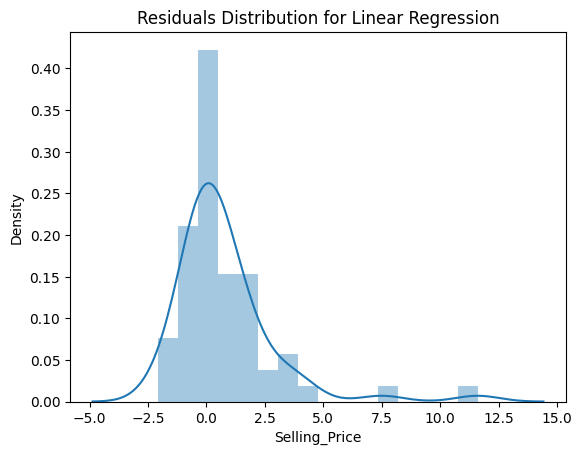

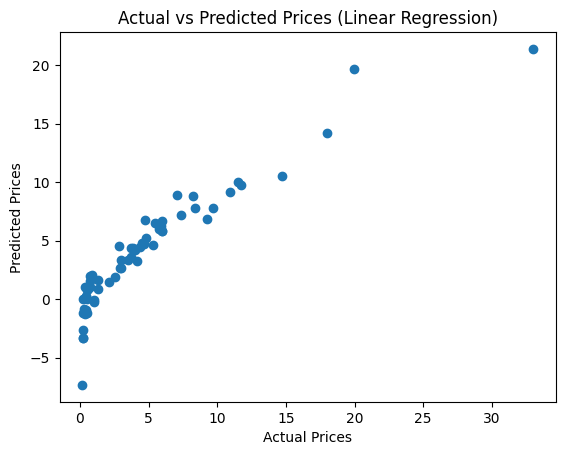

In [34]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
lr_predictions = lr_model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Print the metrics
print("Linear Regression Metrics:")
print("Mean Squared Error (MSE):", lr_mse)
print("Root Mean Squared Error (RMSE):", lr_rmse)
print("Mean Absolute Error (MAE):", lr_mae)
print("R2 Score:", lr_r2)

# Plot residuals and predictions for Linear Regression
sns.distplot(y_test - lr_predictions)
plt.title("Residuals Distribution for Linear Regression")
plt.show()

plt.scatter(y_test, lr_predictions)
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

## RandomForest Regression

Random Forest Regression Metrics:
Mean Squared Error (MSE): 2.54475957704918
Root Mean Squared Error (RMSE): 1.5952302583167046
Mean Absolute Error (MAE): 0.621245901639344
R2 Score: 0.9216204230986677


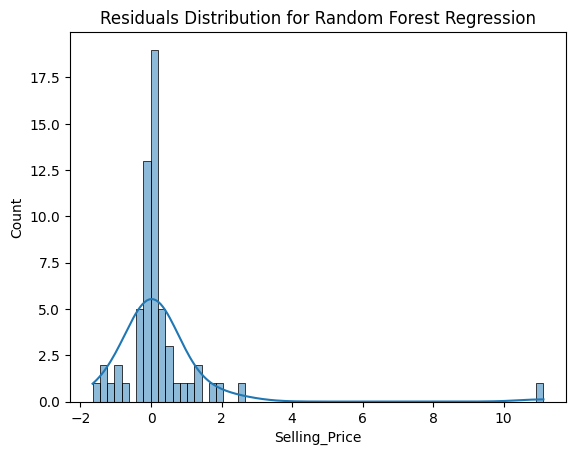

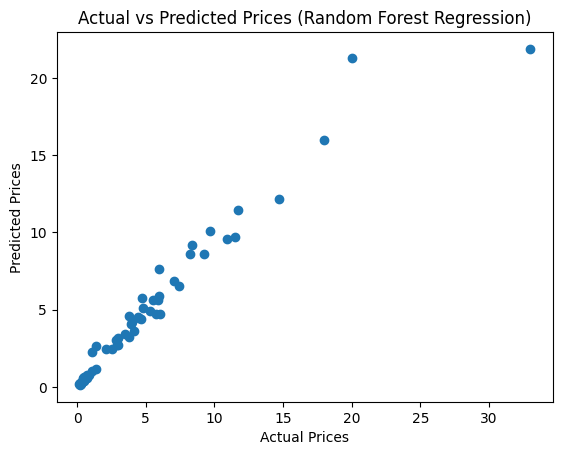

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Print the metrics
print("Random Forest Regression Metrics:")
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R2 Score:", rf_r2)

# Plot residuals and predictions for Random Forest Regression
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_test - rf_predictions, kde=True)
plt.title("Residuals Distribution for Random Forest Regression")
plt.show()

plt.scatter(y_test, rf_predictions)
plt.title("Actual vs Predicted Prices (Random Forest Regression)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

## RandomForest Regressor Hyperparameter Tuning

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [37]:
## Hyperparameters
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [38]:
## Randomized Search CV

# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200,num=12)]
# Number of features to consider at every split
max_features=['auto','sqrt']
# maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
# minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
# minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
# create the random grid
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [41]:
rf=RandomForestRegressor()

# Parameter Breakdown
# 1. estimator
# Description: This is the machine learning model that you want to optimize. In your case, it is represented by rf, which likely stands for a Random Forest model (e.g., RandomForestRegressor or RandomForestClassifier).
# Type: An instance of a scikit-learn estimator.
# 2. param_distributions
# Description: This parameter specifies the hyperparameters and their respective distributions or lists of values to sample from during the search. The variable random_grid should be a dictionary where keys are the hyperparameter names and values are distributions or lists of possible values.
# Type: Dictionary.
# 3. scoring
# Description: This defines the metric used to evaluate the performance of the model. In your case, 'neg_mean_squared_error' indicates that you are interested in minimizing the mean squared error (MSE). The negative sign is used because scikit-learn's scoring functions typically maximize scores.
# Type: String.
# 4. n_iter
# Description: This parameter specifies the number of different combinations of hyperparameters to sample and evaluate. Setting it to 10 means that RandomizedSearchCV will try 10 different sets of hyperparameters.
# Type: Integer.
# 5. cv
# Description: This represents the number of cross-validation folds to use when evaluating each combination of hyperparameters. A value of 5 means that the data will be split into 5 parts, and each part will be used once as a validation set while the others are used for training.
# Type: Integer.
# 6. verbose
# Description: This controls the verbosity of the output during the fitting process. A value of 2 will provide detailed logs about the progress and results of each iteration.
# Type: Integer.
# 7. random_state
# Description: This parameter ensures reproducibility by controlling the random seed used for random number generation. Setting it to 42 (or any integer) allows you to obtain the same results across multiple runs.
# Type: Integer.
# 8. n_jobs
# Description: This parameter specifies how many jobs to run in parallel for both fitting and scoring. Setting it to 1 means that only one job will be run at a time. If set to -1, it would use all available processors.
# Type: Integer.

In [42]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [43]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
predictions=rf_random.predict(X_test)

In [45]:
predictions

array([10.5158302 ,  0.63466318,  2.64859473,  0.68861273,  5.22842985,
        5.43089876, 20.6990786 ,  0.23410931,  0.58422892,  4.35562605,
        0.57460831,  7.90552798,  4.66573039,  0.44587661,  4.67562122,
        3.89492552,  4.70473536,  0.20916412,  2.82238432,  7.32903386,
        0.68861273,  3.73749127,  6.98054687, 20.80619084,  0.27529358,
        0.42805489,  0.3505644 ,  0.29626436,  0.6824258 ,  0.20867207,
        2.59520174, 12.3234755 ,  4.93211944, 10.68361822,  0.562924  ,
        5.44000487,  2.85519903,  3.43292746,  1.13793589,  4.43574934,
        4.66776019,  0.49101946,  5.51647482,  0.25691333, 11.43303906,
        3.36623934,  0.23993714,  4.5993621 ,  6.81547545,  2.62449672,
        0.40176883,  5.89356921,  0.53236396, 10.24514425,  4.57543061,
        2.96601757, 10.81780303,  1.09927745,  7.99841607,  9.6741595 ,
        2.8562655 ])

C:\Users\c.bhat\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Selling_Price', ylabel='Density'>

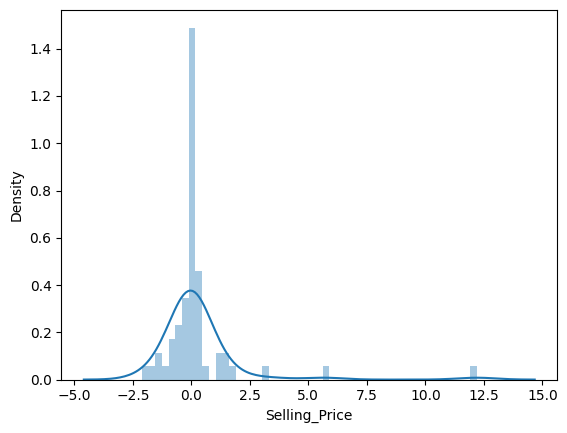

In [46]:
sns.distplot(y_test-predictions)

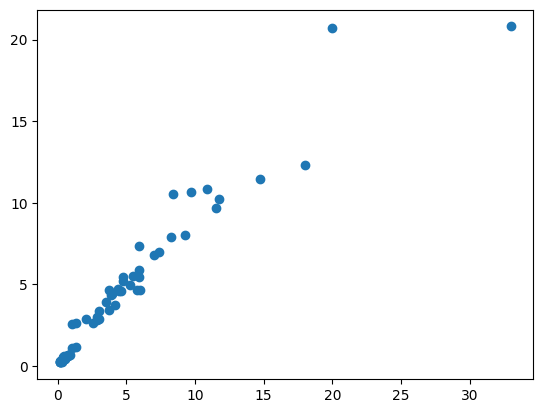

In [47]:
plt.scatter(y_test,predictions)

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)
print("Mean Squared Error (MSE):",mse)
print("Root Mean Squared Error(RMSE):",rmse)
print("Mean Absolute Error(MAE):",mae)
print("R2 Score:",r2)

Mean Squared Error (MSE): 3.5716605813782563
Root Mean Squared Error(RMSE): 1.8898837481121045
Mean Absolute Error(MAE): 0.7531583530331702
R2 Score: 0.8899914759223699


## Second way

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Mean Squared Error (MSE): 2.601514978480496
Root Mean Squared Error (RMSE): 1.6129212561314008
Mean Absolute Error (MAE): 0.6244687886034176
R2 Score: 0.9198723348347815


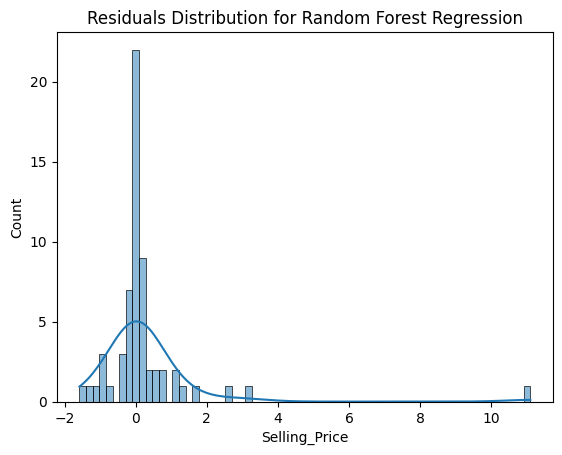

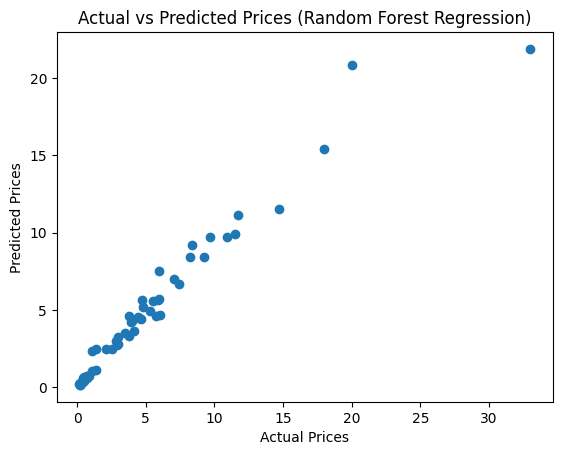

In [49]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter ranges
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=20)]  # Increased range
max_features = ['auto', 'sqrt', 'log2']  # Added 'log2'
max_depth = [None] + [int(x) for x in np.linspace(5, 50, num=10)]  # Include None for no limit
min_samples_split = [2, 5, 10, 15, 20]  # Adjusted values
min_samples_leaf = [1, 2, 5, 10]  # Adjusted values

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Randomized Search CV with increased n_iter and cv
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    scoring='neg_mean_squared_error',
    n_iter=50,  # Increased iterations
    cv=10,      # Increased cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all available processors
)

# Fit the model
rf_random.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_random.predict(X_test)

# Evaluate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)

# Plot residuals and predictions for Random Forest Regression
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_test - predictions, kde=True)
plt.title("Residuals Distribution for Random Forest Regression")
plt.show()

plt.scatter(y_test, predictions)
plt.title("Actual vs Predicted Prices (Random Forest Regression)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# Benefits of Using GridSearchCV
# Exhaustive Search: GridSearchCV systematically evaluates every possible combination of hyperparameters defined in the parameter grid. This ensures that the best combination is found within the specified range, minimizing the risk of missing optimal parameters .
# Deterministic Results: Since it evaluates all combinations, the results are reproducible. You can be confident that the selected hyperparameters are truly the best from the provided options .
# Cross-Validation Support: It incorporates cross-validation, which helps in assessing the model's performance more reliably by reducing overfitting . This is particularly beneficial for small datasets where overfitting is a concern.
# Easy Implementation: GridSearchCV is straightforward to implement with a simple API, making it accessible for practitioners to tune models without extensive coding 
# Performance Metrics: Users can specify various scoring metrics to evaluate model performance, allowing flexibility depending on the task (e.g., accuracy, F1 score) 
# Benefits of Using RandomizedSearchCV
# Efficiency: RandomizedSearchCV randomly samples a specified number of hyperparameter combinations from the parameter grid, making it significantly faster than GridSearchCV, especially when dealing with large search spaces . This is particularly useful for models with many hyperparameters or when computational resources are limited.
# Broader Exploration: By sampling randomly, it can explore a wider range of hyperparameter values and potentially discover better configurations that might not be found in a grid search 
# Reduced Computational Cost: Since it evaluates only a subset of combinations, it requires less computational power and time compared to exhaustive searches, which is advantageous for large datasets or complex models .
# Flexibility in Sampling: Users can define how many iterations to run, allowing for a balance between thoroughness and computational efficiency .
# Good for Large Parameter Spaces: When dealing with many parameters or continuous ranges, RandomizedSearchCV can be more effective as it avoids the combinatorial explosion associated with grid searches .
# In summary, GridSearchCV is ideal when you have a smaller search space and need thorough exploration to find the best parameters, while RandomizedSearchCV is preferable for larger search spaces where speed and efficiency are critical.

## Third Way

In [50]:
from sklearn.model_selection import GridSearchCV

# Define a smaller grid for exhaustive search
param_grid = {
    'n_estimators': [100, 200, 300],  # Smaller range for exhaustive search
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Make predictions using the best model
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)

# Evaluate metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mean Squared Error (MSE): 2.54475957704918
Root Mean Squared Error (RMSE): 1.5952302583167046
Mean Absolute Error (MAE): 0.621245901639344
R2 Score: 0.9216204230986677


In [51]:
import pickle

with open('random_forest_regression_model.pkl','wb') as f:
    pickle.dump(grid_search,f)

# Advantages of Creating Machine Learning Models to Pickle
# Pickling is a powerful technique in Python used for serializing and deserializing objects, particularly beneficial in the context of machine learning. Here are the key advantages of using pickling for machine learning models:
# 1. Preservation of Model State
# Pickling allows for the complete preservation of a trained model's state, including all learned parameters such as weights and biases. This means that once a model is trained, it can be saved and later reloaded without any loss of information, enabling immediate use for predictions on new data without retraining.
# 2. Time and Resource Efficiency
# Training machine learning models can be time-consuming and resource-intensive. By pickling a trained model, you save significant time and computational resources. Instead of retraining the model from scratch when new data becomes available, you can simply load the pickled model and use it for predictions, which is especially useful in production environments where quick response times are critical.
# 3. Reusability Across Different Projects
# Pickled models can be reused across different projects or notebooks. For example, if you have conducted feature engineering in one notebook, you can pickle the processed data and load it into another notebook for modeling. This facilitates better workflow management and reduces redundancy in data processing tasks.
# 4. Simplified Workflow
# Using pickling simplifies the workflow in machine learning projects. Researchers can easily save intermediate results or entire models at various stages of development. This flexibility allows for experimentation without the fear of losing progress, as models can be restored to any saved state56.
# 5. Compatibility with Custom Objects
# The pickle module can handle complex Python objects, including custom classes used in machine learning models. This versatility makes it suitable for various applications where standard serialization formats may fall short.
# 6. Easy Integration with Python Ecosystem
# As part of the standard Python library, pickling does not require additional dependencies, making it straightforward to implement in any Python project. It integrates seamlessly with popular libraries like scikit-learn, allowing users to save and load models with minimal effort.
# 7. Support for Complex Data Structures
# Unlike simpler serialization formats like JSON, which may struggle with complex data types (e.g., tuples or datetime objects), pickling can serialize almost any Python object structure, making it ideal for complex machine learning models that require preserving intricate relationships within data.

In [52]:
import os
print(os.path.getsize('random_forest_regression_model.pkl'))

1832374
